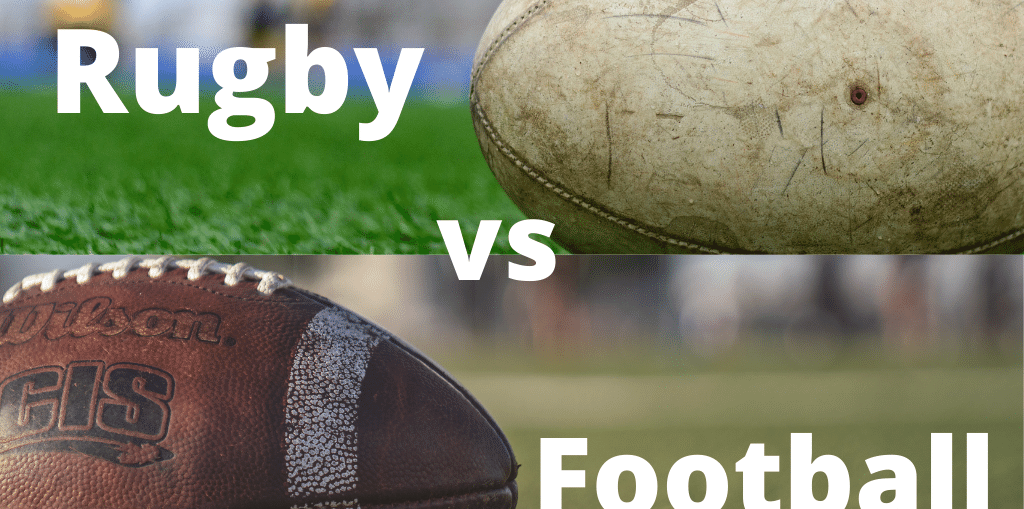

The main difference between football and rugby is the type of ball the game is played with.  
Football uses a traditional, spherical ball. Rugby is known for its unusual, elongated ball designed for easier grabbing and carrying. Rugby teams also have more players.   
During a rugby match, each team can have between 13 and 15 players on the field. In football, there are only 11 players on the field at any given time.      
We are trying to make the classification of sports on based of image.

## 1. Importing Libraries

In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import cv2

#Libraries for Machine Learning
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

## 2.Reading the Data

In [2]:
#import the data from the Image data in the directory
labels=['rugby','soccer']
img_size=224
def get_data(data_dir):
    data=[]
    for label in labels:
        path=os.path.join(data_dir,label)
        class_num=labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr=cv2.imread(os.path.join(path,img))[...,::-1]
                resized_arr=cv2.resize(img_arr,(img_size,img_size))
                data.append([resized_arr,class_num])
            except Exception as e:
                print(e)
                
    return np.array(data,dtype='object')

In [3]:
#import the image data
train=get_data(r"C:\Users\Hardik\Python\Pratice\Neural Network\Image Classification\Image_data\train")
test=get_data(r"C:\Users\Hardik\Python\Pratice\Neural Network\Image Classification\Image_data\test")

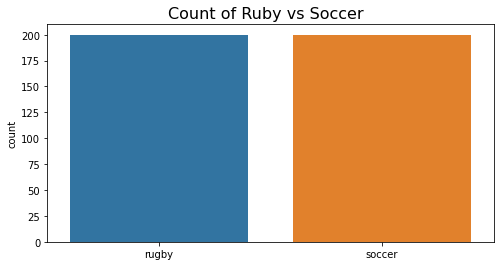

In [4]:
#Distinguish the image & appending the respective labels of the sports
l=[]
for i in train:
    if (i[1]==0):
        l.append('rugby')
    else:
        l.append('soccer')
        
plt.figure(figsize=(8,4))
plt.title('Count of Ruby vs Soccer  ',size=16)
sns.countplot(x=l);


In [5]:
#Checking the shape of data
train.shape

(400, 2)

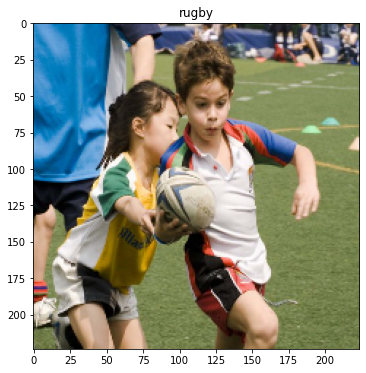

In [6]:
#Checking a sample Image for Reference
plt.figure(figsize=(8,6))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]]);

A person well versed with sports will be able to recognize the image as Rugby.   
There could be different aspects of the image that helped you identify it as Rugby, it could be the shape of the ball or the outfit of the player.
But at some instant looks like soccer as well!Confusioning as well ?

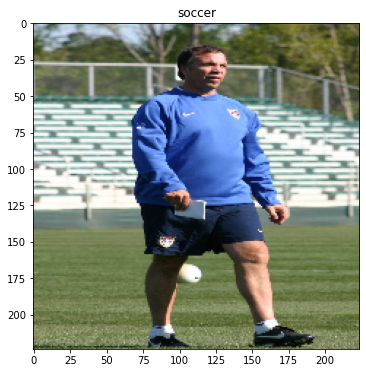

In [7]:
# Check for another Image for Reference
plt.figure(figsize=(10,6))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]]);

In this image we can't say it a soccer or rubgy,the shape of ball behind the man is not full visible or we can say we cant get the shape of ball to identify the sports.

In [8]:
#Let's split the data into Train & Test data
X_train=[]
X_test=[]
y_train=[]
y_test=[]

for feature,label in train:
    X_train.append(feature)
    y_train.append(label)
    
for feature,label in test:
    X_test.append(feature)
    y_test.append(label)


## 3. Data Preprocessing

In [9]:
#Normalise the image data 
X_train=np.array(X_train) / 255.0

X_test=np.array(X_test) / 255.0

In [10]:
#Lets reshape the data so every image gets same size 
X_train.reshape(-1,img_size,img_size,1)
y_train=np.array(y_train)

X_test.reshape(-1,img_size,img_size,1)
y_test=np.array(y_test)

## 4. Data Augmentation

In [11]:
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=30,zoom_range=0.2,
                          width_shift_range=0.1,height_shift_range=0.1,
                          horizontal_flip=True,vertical_flip=False)
datagen.fit(X_train)

## 5. Appling Simple CNN

In [12]:
#A simple CNN model contains 3 Convolutional layers followed by max-pooling layers. 
#A dropout layer is added after the 3rd maxpool operation to avoid overfitting.

model=Sequential()
model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [13]:
#Let’s compile the model using Adam as our optimizer &
#SparseCategoricalCrossentropy as the loss function.
#using sparse categorical cross entropy over categorical_crossentropy to saves time in memory as well as computation 
#because it simply uses a single integer for a class, rather than a whole vector.

#Now, let’s train our model for 100 epochs.

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100


C:\Users\Hardik\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


13/13 [==============================] - 215s 13s/step - loss: 0.7854 - accuracy: 0.4849 - val_loss: 0.7013 - val_accuracy: 0.5000
Epoch 2/100
13/13 [==============================] - 100s 8s/step - loss: 0.6929 - accuracy: 0.4812 - val_loss: 0.6666 - val_accuracy: 0.5984
Epoch 3/100
13/13 [==============================] - 88s 7s/step - loss: 0.6306 - accuracy: 0.6725 - val_loss: 0.6131 - val_accuracy: 0.6803
Epoch 4/100
13/13 [==============================] - 87s 7s/step - loss: 0.5713 - accuracy: 0.7127 - val_loss: 0.7004 - val_accuracy: 0.5705
Epoch 5/100
13/13 [==============================] - 95s 8s/step - loss: 0.4567 - accuracy: 0.7846 - val_loss: 0.6526 - val_accuracy: 0.6246
Epoch 6/100
13/13 [==============================] - 90s 7s/step - loss: 0.3604 - accuracy: 0.8511 - val_loss: 0.8064 - val_accuracy: 0.6443
Epoch 7/100
13/13 [==============================] - 91s 7s/step - loss: 0.2284 - accuracy: 0.8971 - val_loss: 0.7003 - val_accuracy: 0.6705
Epoch 8/100
13/13 [===

13/13 [==============================] - 92s 7s/step - loss: 2.7364e-05 - accuracy: 1.0000 - val_loss: 1.9235 - val_accuracy: 0.6689
Epoch 58/100
13/13 [==============================] - 91s 7s/step - loss: 2.9087e-05 - accuracy: 1.0000 - val_loss: 1.9265 - val_accuracy: 0.6689
Epoch 59/100
13/13 [==============================] - 90s 7s/step - loss: 2.7387e-05 - accuracy: 1.0000 - val_loss: 1.9347 - val_accuracy: 0.6689
Epoch 60/100
13/13 [==============================] - 93s 7s/step - loss: 2.6391e-05 - accuracy: 1.0000 - val_loss: 1.9404 - val_accuracy: 0.6689
Epoch 61/100
13/13 [==============================] - 92s 7s/step - loss: 2.2815e-05 - accuracy: 1.0000 - val_loss: 1.9466 - val_accuracy: 0.6672
Epoch 62/100
13/13 [==============================] - 98s 8s/step - loss: 2.4034e-05 - accuracy: 1.0000 - val_loss: 1.9514 - val_accuracy: 0.6672
Epoch 63/100
13/13 [==============================] - 93s 7s/step - loss: 2.2100e-05 - accuracy: 1.0000 - val_loss: 1.9559 - val_accuracy

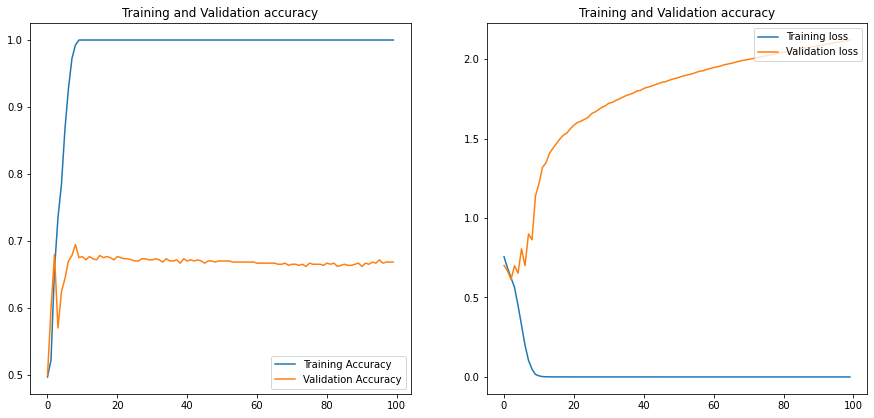

In [14]:
#Visualization of accuracy and loss on each epoch
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(100)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.subplot(2,2,2)
plt.plot(epochs_range,loss,label='Training loss')
plt.plot(epochs_range,val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation accuracy');

In [15]:
#Predicting the sports on Test data
predictions=np.argmax(model.predict(X_test),axis=-1)

#Regain the original shape to evaluate predictions
predictions=predictions.reshape(1,-1)[0]

#Let’s also print the classification report to get more detailed results.
print(classification_report(y_test,predictions,target_names=['Rugby(class 0)','Soccer(class 1)']))

                 precision    recall  f1-score   support

 Rugby(class 0)       0.67      0.67      0.67       305
Soccer(class 1)       0.67      0.67      0.67       305

       accuracy                           0.67       610
      macro avg       0.67      0.67      0.67       610
   weighted avg       0.67      0.67      0.67       610



### By applying simple CNN model was able to acheive 67% accuracy & can't say it a descent accuracy.

### Transfer learning
Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task. Another crucial application of transfer learning is when the dataset is small, by using a pre-trained model on similar images we can easily achieve high performance. 


We will create a base model from the MobileNetV2 model.    
This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. 
This base of knowledge will help us classify Rugby and Soccer from our specific dataset.

In [16]:
#By specifying the include_top=False to avoid full connected layer at the output.
base_model=tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')

# By specifying the base_model.trainable=False so ,it prevent the weights in our base model from being 
#updated during training.
base_model.trainable=False

# GlobalAveragePooling function is use on base model to convert the features into a single vector per image. 
#& we add a dropout of 0.2 and the final dense layer with 2 neurons and softmax activation.
model=tf.keras.Sequential([base_model,tf.keras.layers.GlobalAveragePooling2D(),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(2,activation='softmax')])

In [17]:
#Checking the shape of train & test data
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((400, 224, 224, 3), (400,), (610, 224, 224, 3), (610,))

in X_train there are 400 image with image size of 224 x 224 x 3 and respectively in y_train 400 labels.       
in X_test there are 610 image with image size of 224 x 224 x 3 and respectively in y_train 610 labels.

In [18]:
#lets again train the model by using transfer learning
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100


C:\Users\Hardik\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


13/13 [==============================] - 156s 10s/step - loss: 0.9321 - accuracy: 0.4600 - val_loss: 0.7819 - val_accuracy: 0.5852
Epoch 2/100
13/13 [==============================] - 100s 7s/step - loss: 0.5693 - accuracy: 0.7025 - val_loss: 0.5163 - val_accuracy: 0.7459
Epoch 3/100
13/13 [==============================] - 93s 8s/step - loss: 0.4202 - accuracy: 0.7975 - val_loss: 0.4298 - val_accuracy: 0.8230
Epoch 4/100
13/13 [==============================] - 90s 7s/step - loss: 0.3403 - accuracy: 0.8500 - val_loss: 0.3890 - val_accuracy: 0.8459
Epoch 5/100
13/13 [==============================] - 93s 7s/step - loss: 0.2869 - accuracy: 0.8850 - val_loss: 0.3716 - val_accuracy: 0.8541
Epoch 6/100
13/13 [==============================] - 92s 7s/step - loss: 0.2790 - accuracy: 0.8950 - val_loss: 0.3448 - val_accuracy: 0.8607
Epoch 7/100
13/13 [==============================] - 91s 7s/step - loss: 0.2585 - accuracy: 0.8800 - val_loss: 0.3470 - val_accuracy: 0.8623
Epoch 8/100
13/13 [===

Epoch 59/100
13/13 [==============================] - 90s 7s/step - loss: 0.0396 - accuracy: 0.9950 - val_loss: 0.3495 - val_accuracy: 0.8738
Epoch 60/100
13/13 [==============================] - 89s 7s/step - loss: 0.0358 - accuracy: 0.9975 - val_loss: 0.3540 - val_accuracy: 0.8738
Epoch 61/100
13/13 [==============================] - 89s 7s/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.3499 - val_accuracy: 0.8754
Epoch 62/100
13/13 [==============================] - 90s 7s/step - loss: 0.0341 - accuracy: 1.0000 - val_loss: 0.3521 - val_accuracy: 0.8754
Epoch 63/100
13/13 [==============================] - 90s 7s/step - loss: 0.0507 - accuracy: 0.9850 - val_loss: 0.3744 - val_accuracy: 0.8689
Epoch 64/100
13/13 [==============================] - 94s 8s/step - loss: 0.0283 - accuracy: 0.9975 - val_loss: 0.3524 - val_accuracy: 0.8738
Epoch 65/100
13/13 [==============================] - 95s 8s/step - loss: 0.0398 - accuracy: 0.9950 - val_loss: 0.3905 - val_accuracy: 0.8639
Epoch 

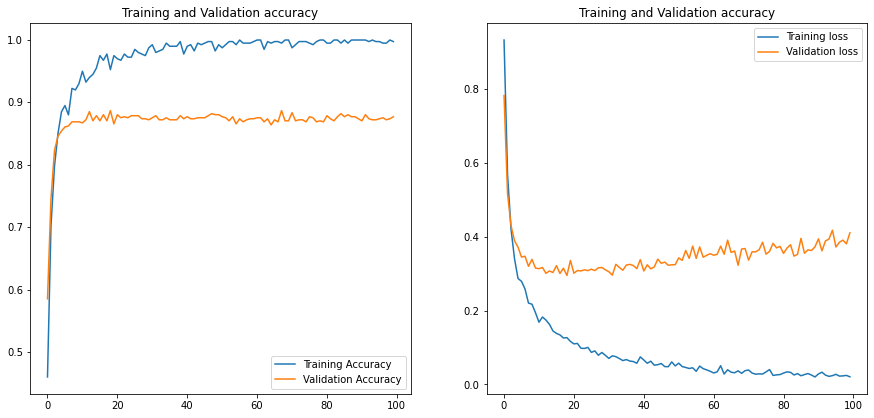

In [19]:
#Visualization of accuracy and loss
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(100)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation accuracy')

plt.subplot(2,2,2)
plt.plot(epochs_range,loss,label='Training loss')
plt.plot(epochs_range,val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation accuracy');

In [20]:
predictions=np.argmax(model.predict(X_test), axis=-1)
predictions=predictions.reshape(1,-1)[0]
print(classification_report(y_test,predictions,target_names=['Rugby(class 0)','Soccer(class 1)']))

                 precision    recall  f1-score   support

 Rugby(class 0)       0.83      0.95      0.89       305
Soccer(class 1)       0.94      0.80      0.87       305

       accuracy                           0.88       610
      macro avg       0.89      0.88      0.88       610
   weighted avg       0.89      0.88      0.88       610



### By applying transfer learning was able to acheive better accuracy compared to simple CNN.
